In [ ]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

In [ ]:
# extracting the compressed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

In [ ]:
!ls

**Importing the Dependencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [10]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

**Displaying the Images**

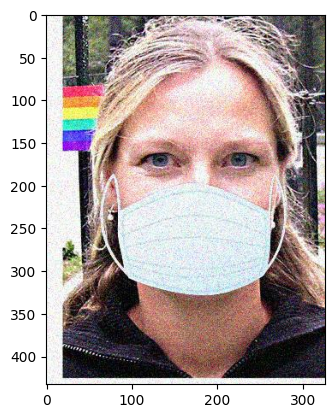

In [17]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1807.jpg')
imgplot = plt.imshow(img)
plt.show()

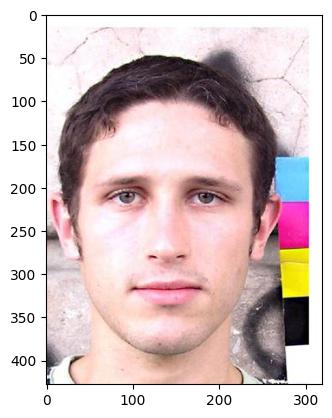

In [24]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1234.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [26]:
type(data)

list

In [27]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[172, 144,  83],
        [177, 148,  86],
        [180, 150,  89],
        ...,
        [ 80,  64,  30],
        [ 68,  52,  30],
        [126, 115,  67]],

       [[176, 149,  83],
        [180, 151,  86],
        [182, 151,  89],
        ...,
        [104,  86,  39],
        [ 48,  33,  20],
        [119, 111,  69]],

       [[181, 151,  87],
        [182, 152,  88],
        [184, 154,  90],
        ...,
        [136, 114,  64],
        [ 45,  33,  17],
        [111,  94,  65]]], dtype=uint8)
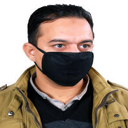

In [29]:
data[2]

In [30]:
type(data[0])

numpy.ndarray

In [31]:
data[0].shape

(128, 128, 3)

In [32]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [33]:
type(X)

numpy.ndarray

In [34]:
type(Y)

numpy.ndarray

In [35]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [36]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [38]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [39]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 255, 253],
        [253, 255, 250]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [153, 152, 155],
        [142, 142, 143],
        [146, 146, 144]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [119, 114, 121],
        [105, 102, 108],
        [109, 108, 111]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [226,  25,  71],
        [240,  23,  74],
        [224,  30,  72]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [220,  26,  71],
        [239,  27,  78],
        [225,  28,  74]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [208,  23,  68],
        [218,  18,  66],
        [207,  16,  60]]], dtype=uint8)
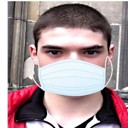

In [40]:
X_train[0]

In [41]:
X_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 1.        , 0.99215686],
        [0.99215686, 1.        , 0.98039216]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.6       , 0.59607843, 0.60784314],
        [0.55686275, 0.55686275, 0.56078431],
        [0.57254902, 0.57254902, 0.56470588]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.46666667, 0.44705882, 0.4745098 ],
        [0.41176471, 0.4       , 0.42352941],
        [0.42745098, 0.42352941, 0.43529412]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

**Building a Convolutional Neural Networks (CNN)**

In [42]:
import tensorflow as tf
from tensorflow import keras

In [43]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [44]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [67]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=7)

Epoch 1/7
170/170 [==============================] - 3s 18ms/step - loss: 0.1141 - acc: 0.9560 - val_loss: 0.2043 - val_acc: 0.9240
Epoch 2/7
170/170 [==============================] - 3s 18ms/step - loss: 0.0836 - acc: 0.9676 - val_loss: 0.3826 - val_acc: 0.9190
Epoch 3/7
170/170 [==============================] - 3s 19ms/step - loss: 0.0684 - acc: 0.9763 - val_loss: 0.2550 - val_acc: 0.9322
Epoch 4/7
170/170 [==============================] - 3s 18ms/step - loss: 0.0732 - acc: 0.9731 - val_loss: 0.2486 - val_acc: 0.9372
Epoch 5/7
170/170 [==============================] - 3s 18ms/step - loss: 0.0864 - acc: 0.9682 - val_loss: 0.2796 - val_acc: 0.9190
Epoch 6/7
170/170 [==============================] - 3s 18ms/step - loss: 0.0673 - acc: 0.9724 - val_loss: 0.2995 - val_acc: 0.9339
Epoch 7/7
170/170 [==============================] - 3s 18ms/step - loss: 0.0597 - acc: 0.9790 - val_loss: 0.2934 - val_acc: 0.9405


**Model Evaluation**

In [68]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 8ms/step - loss: 0.3771 - acc: 0.9318
Test Accuracy = 0.9318332076072693


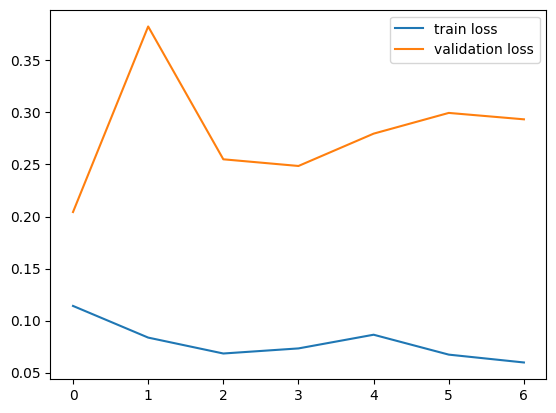

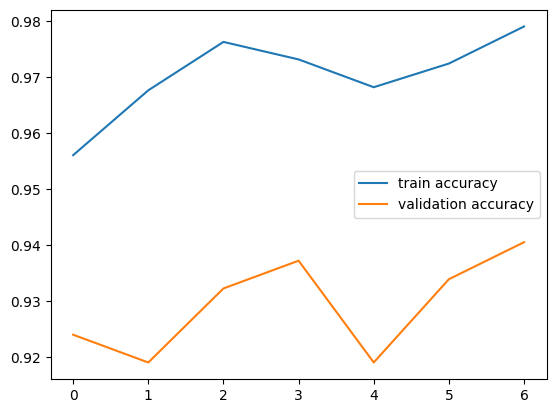

In [69]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/data/with_mask/with_mask_1807.jpg


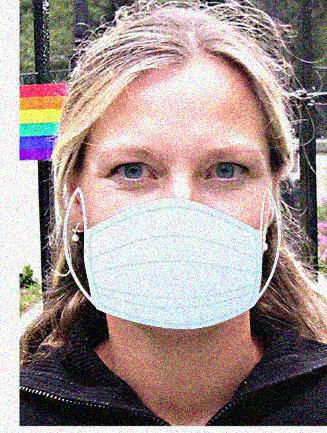

1/1 [==============================] - 0s 48ms/step
[[0.48377487 0.6806768 ]]
1
The person in the image is wearing a mask


In [70]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/data/without_mask/without_mask_1022.jpg


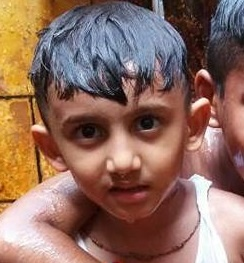

1/1 [==============================] - 0s 23ms/step
[[0.018372   0.99655896]]
1
The person in the image is not wearing a mask


In [72]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')